# Python Block Course
# Assignment 3: Importing, formatting and plotting data

Prof. Dr. Karsten Donnay, Stefan Scholz

Winter Term 2019 / 2020

In this third assignment we will practice how to build a data pipeline in Python. You can score up to 15 points in this assignment. Please submit your solutions inside this notebook in your repository on GitHub. The deadline for submission is on Thursday, October 17, 09:59 am. You will get individual feedback in your repository.

## 3.1 Tragedy of Titanic

During the maiden voyage of the RMS Titanic, she collided with an iceberg. Even though the Titanic was considered unsinkable, on April 15, 1912 she sank and tragically sweeped most of the passangers on board in their death. They only carried enough lifeboats for about half the number on board. Without a question, the sinking of the Titanic is one of the most infamous shipwrecks in history. 

The details of the passengers were carefully collected. The data shows, among other information, which passenger survived, which class he was in, which sex he had, and what age he was. 

First of all we are interested in finding out how good the chances of survival were between the different passangers on board. We will look at the relative chances of survival between sex, age and class. 

In the second step, we will conduct a logistic regression to predict who most likely survived given some characteristics. We will verify our predictions with the characters from the movie, Rose Dewitt Bukater played by Kate Winslet, and Jack Dawson played by Leonardo DiCaprio. 

<div class="alert alert-block alert-info">
    <b>Exercise (2 Points)</b>: Load a table with the data available <a href="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv">here</a>. Inspect the data and find out which variables have missing values.
</div>

In [66]:
import pandas as pd
#df = pd.read_csv('/home/niangu/桌面/数据挖掘与建模/复习/titanic_train.csv')
df = pd.read_csv('/home/niangu/下载/tatinic.csv')
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [67]:
df.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
5,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


You notice that there are e.g. some missing values in the variable age. But you want to use this variable in your later analysis, so you decide to use a median imputation for all missing values in the variable age. 

<div class="alert alert-block alert-info">
    <b>Exercise (1 Point)</b>: Impute all missing values in the variable age with its median.
</div>

In [68]:
df_age = df['age']
df_age.fillna(df_age.median(), inplace=True)

In [69]:
print(df_age.isnull)

<bound method Series.isnull of 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5      28.0
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17     28.0
18     31.0
19     28.0
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26     28.0
27     19.0
28     28.0
29     28.0
       ... 
861    21.0
862    48.0
863    28.0
864    24.0
865    42.0
866    27.0
867    31.0
868    28.0
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878    28.0
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64>


<div class="alert alert-block alert-info">
    <b>Exercise (2 Points)</b>: Find the relative chances of survival for all sexes. Make a bar plot with the sexes and their relative chances of survival. Label your plot. 
</div>

In [70]:
print(df.head(5))

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


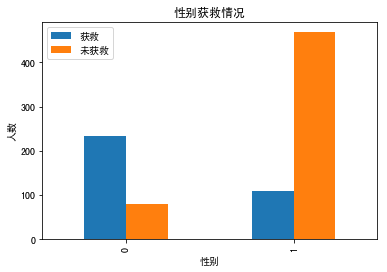

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

pat = {
    'male':1,
    'female':0
}
df['sex'] = df['sex'].map(pat)
df_copy = df.copy()
s0 = df.sex[df_copy.survived == 0].value_counts()
s1 = df.sex[df_copy.survived == 1].value_counts()
df_survived = pd.DataFrame({u'获救':s1, u'未获救':s0})
df_survived.plot(kind='bar')
plt.title(u'性别获救情况')
plt.xlabel(u'性别')
plt.ylabel(u'人数')
plt.show()

<div class="alert alert-block alert-info">
    <b>Exercise (2 Points)</b>: Find the relative chances of survival for all ages. Make a bar plot with age and their relative chances of survival. Bin age in categories of 10 years. Label your plot. 
</div>

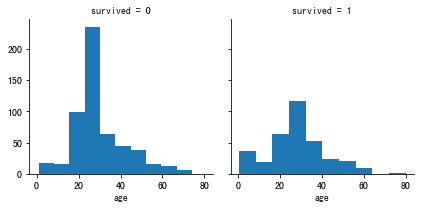

In [72]:
g = sns.FacetGrid(df,col='survived')
g.map(plt.hist,'age',bins=10)

In [73]:
print(df.head(5))

   survived  pclass  sex   age  sibsp  parch     fare embarked  class    who  \
0         0       3    1  22.0      1      0   7.2500        S  Third    man   
1         1       1    0  38.0      1      0  71.2833        C  First  woman   
2         1       3    0  26.0      0      0   7.9250        S  Third  woman   
3         1       1    0  35.0      1      0  53.1000        S  First  woman   
4         0       3    1  35.0      0      0   8.0500        S  Third    man   

   adult_male deck  embark_town alive  alone  
0        True  NaN  Southampton    no  False  
1       False    C    Cherbourg   yes  False  
2       False  NaN  Southampton   yes   True  
3       False    C  Southampton   yes  False  
4        True  NaN  Southampton    no   True  


<div class="alert alert-block alert-info">
    <b>Exercise (2 Points)</b>: Find the relative chances of survival for all classes. Make a bar plot with class and their relative chances of survival. Label your plot. 
</div>

/usr/local/bin/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


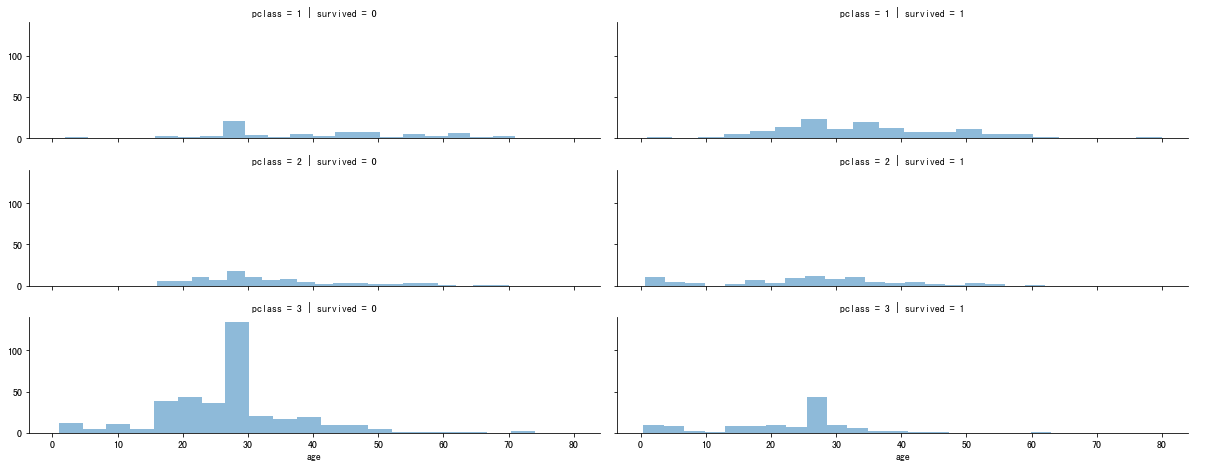

In [74]:
grid = sns.FacetGrid(df,col='survived',row='pclass',size=2.2,aspect=3.8)
grid.map(plt.hist,'age',alpha=.5,bins=20)
grid.add_legend()

In [75]:
print(df.head())

   survived  pclass  sex   age  sibsp  parch     fare embarked  class    who  \
0         0       3    1  22.0      1      0   7.2500        S  Third    man   
1         1       1    0  38.0      1      0  71.2833        C  First  woman   
2         1       3    0  26.0      0      0   7.9250        S  Third  woman   
3         1       1    0  35.0      1      0  53.1000        S  First  woman   
4         0       3    1  35.0      0      0   8.0500        S  Third    man   

   adult_male deck  embark_town alive  alone  
0        True  NaN  Southampton    no  False  
1       False    C    Cherbourg   yes  False  
2       False  NaN  Southampton   yes   True  
3       False    C  Southampton   yes  False  
4        True  NaN  Southampton    no   True  


In the next step you want to perform a logistic regression. Using the variables explored so far, sex, age and class, you want to predict the chance of survival. However, you notice that the variables sex and class are coded as categorical variables and cannot be handled by a logistic regression, so you decide for a one-hot encoding. With one-hot encoding, each category of each previous variable gets its own variable and is then binary encoded. 

<div class="alert alert-block alert-info">
    <b>Exercise (2 Points)</b>: Encode the variables sex and class with one-hot encoding as separate variables in the dataset.
</div>

In [76]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
#a = np.array(df['pclass']).reshape(1, -1)
#b = OneHotEncoder().fit(a)
#print(b.transform(a).toarray())
#df['pclass'] = pd.get_dummies(df['pclass'], sparse=True)
ff = pd.get_dummies(df['pclass'], sparse=True)
print(ff)


     1  2  3
0    0  0  1
1    1  0  0
2    0  0  1
3    1  0  0
4    0  0  1
5    0  0  1
6    1  0  0
7    0  0  1
8    0  0  1
9    0  1  0
10   0  0  1
11   1  0  0
12   0  0  1
13   0  0  1
14   0  0  1
15   0  1  0
16   0  0  1
17   0  1  0
18   0  0  1
19   0  0  1
20   0  1  0
21   0  1  0
22   0  0  1
23   1  0  0
24   0  0  1
25   0  0  1
26   0  0  1
27   1  0  0
28   0  0  1
29   0  0  1
..  .. .. ..
861  0  1  0
862  1  0  0
863  0  0  1
864  0  1  0
865  0  1  0
866  0  1  0
867  1  0  0
868  0  0  1
869  0  0  1
870  0  0  1
871  1  0  0
872  1  0  0
873  0  0  1
874  0  1  0
875  0  0  1
876  0  0  1
877  0  0  1
878  0  0  1
879  1  0  0
880  0  1  0
881  0  0  1
882  0  0  1
883  0  1  0
884  0  0  1
885  0  0  1
886  0  1  0
887  1  0  0
888  0  0  1
889  1  0  0
890  0  0  1

[891 rows x 3 columns]


In [77]:
#print(df.loc[:,["age", 
print(df['pclass'])

0      3
1      1
2      3
3      1
4      3
5      3
6      1
7      3
8      3
9      2
10     3
11     1
12     3
13     3
14     3
15     2
16     3
17     2
18     3
19     3
20     2
21     2
22     3
23     1
24     3
25     3
26     3
27     1
28     3
29     3
      ..
861    2
862    1
863    3
864    2
865    2
866    2
867    1
868    3
869    3
870    3
871    1
872    1
873    3
874    2
875    3
876    3
877    3
878    3
879    1
880    2
881    3
882    3
883    2
884    3
885    3
886    2
887    1
888    3
889    1
890    3
Name: pclass, Length: 891, dtype: int64


In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
X = df.loc[:,["sex", "pclass", "age"]]
y = df["survived"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=101)

log_model = LogisticRegression()
log_model.fit(X_train,y_train)
log_model_Predict = log_model.predict(X_test)

#print('Confusion Matrix \n',confusion_matrix(y_test,log_model_Predict))
print('\n')
print('Classsification Report \n',classification_report(y_test,log_model_Predict))



Classsification Report 
               precision    recall  f1-score   support

           0       0.77      0.88      0.82       154
           1       0.79      0.64      0.71       114

   micro avg       0.78      0.78      0.78       268
   macro avg       0.78      0.76      0.76       268
weighted avg       0.78      0.78      0.77       268



/home/niangu/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Finally, you want to know what your model predicts for the two main characters in the movie Titanic. The character Rose Dewitt Bukater is played by Kate Winslet and is 17 years old, female and in first class. The character Jack Dawson is played by Leonardo DiCaprio and is 20 years old, male and in third class. 

<div class="alert alert-block alert-info">
    <b>Exercise (2 Points)</b>: Predict whether Rose or Jack survive using your logistic regression model. 
</div>

In [65]:
Rose_Dewitt_Bukater = np.array([0, 1, 17]).reshape(1, -1)
#a = df.loc[:,["sex", "pclass", "age"]]
#c = a.loc[1]
print(log_model.predict(Rose_Dewitt_Bukater))

[1]
